In [10]:
# This code will read the tokens from tokenized_complete.txt, perform sentiment analysis on each token, and write the results to sentiment_results.txt. Each line in sentiment_results.txt will be a dictionary representing the sentiment scores of a token.Please note that this is a very basic example. The SentimentIntensityAnalyzer is more effective when used on larger pieces of text (like sentences or paragraphs) rather than individual tokens. Also, this code assumes that your tokens are separated by spaces. If your tokens are separated by something else, you’ll need to modify the split() function accordingly. 

import nltk, csv
import re
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize an empty dictionary to store results
results = {}

# Initialize novel_name to None
novel_name = None

# Define a regex pattern for the novel titles
pattern = re.compile(r'\[(\w+)\]')

# Open the input file
with open('../output/merged_titles.txt', 'r') as f:
    # Iterate over each line in the file
    for line in f:
        # Remove leading/trailing whitespace
        line = line.strip()
        # If the line is a novel title (matches the regex pattern)
        match = pattern.match(line)
        if match:
            # If a novel has been processed, perform sentiment analysis on its entire text
            if novel_name:
                sentiment = sia.polarity_scores(' '.join(results[novel_name]))
                results[novel_name] = sentiment
            # Extract the new novel name and initialize its results list
            novel_name = match.group(1)
            results[novel_name] = []
        # If the line is part of a novel
        elif novel_name:
            # Add the line to the novel's results list
            results[novel_name].append(line)

# If a novel has been processed, perform sentiment analysis on its entire text
if novel_name:
    sentiment = sia.polarity_scores(' '.join(results[novel_name]))
    results[novel_name] = sentiment

# Open the output file
with open('../output/merged_sentiment_results.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the headers to the file
    writer.writerow(['novel_name', 'neg', 'neu', 'pos', 'compound'])
    # Iterate over each novel and its results
    for novel_name, sentiment in results.items():
        # Write the novel name and sentiment result to the file
        writer.writerow([novel_name] + list(sentiment.values()))


novel_name
AARONTROW                          -0.9992
ANEYEFORANEYE                       1.0000
ANUNPROTECTEDFEMALEATTHEPYRAMIDS    1.0000
ARIDEACROSSPALESTINE                0.9750
BARCHESTERTOWERS                    1.0000
                                     ...  
THEVICAROFBULLHAMPTON               0.0000
THEWARDEN                           1.0000
THEWAYWELIVENOW                     1.0000
TRAVELLINGSKETCHES                  1.0000
WHYFRAUFROHMANNRAISEDHERPRICES      1.0000
Name: compound, Length: 62, dtype: float64


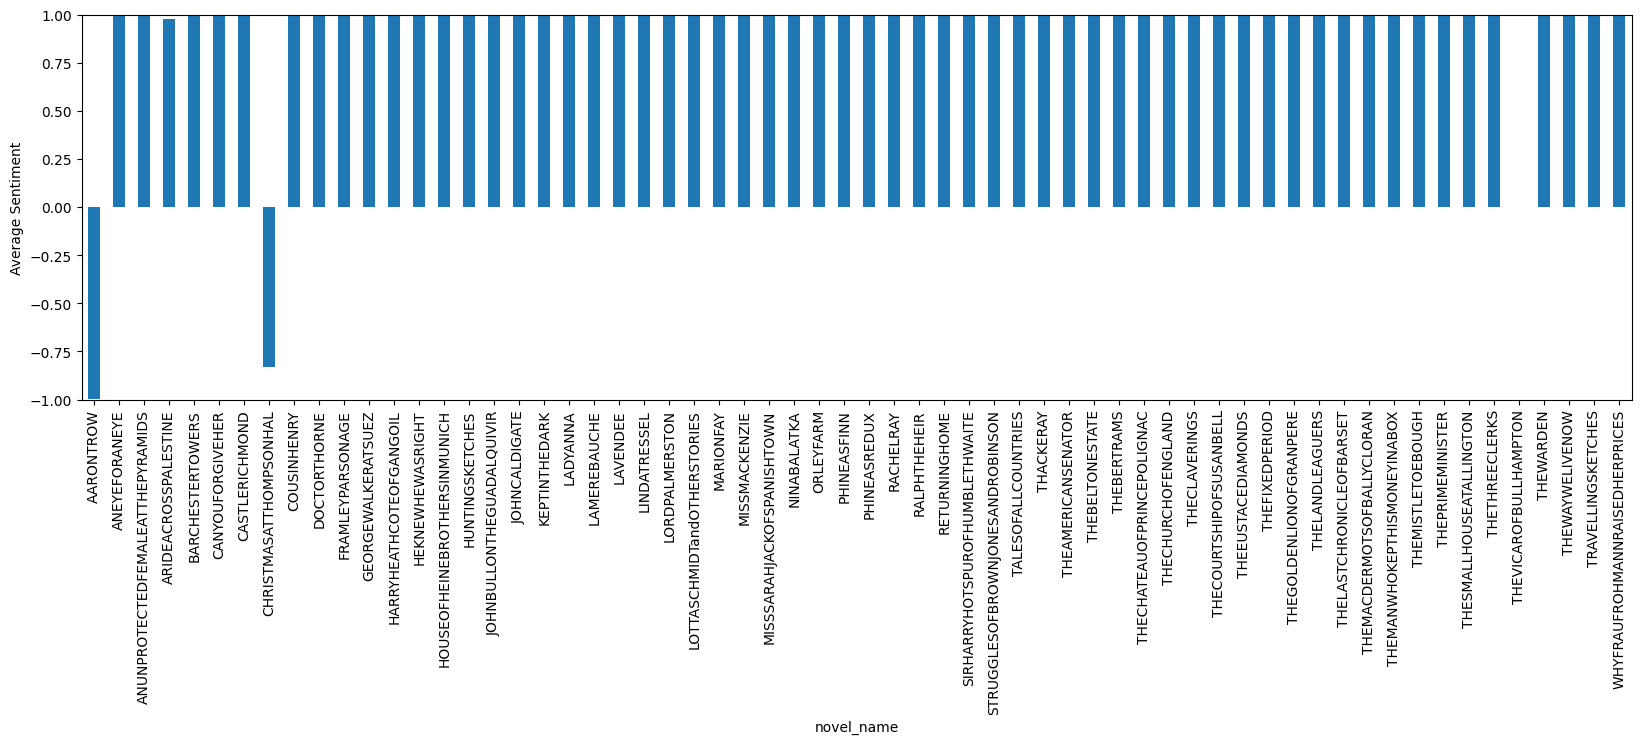

In [24]:
# Visualise the results

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../output/merged_sentiment_results.csv', sep=",")

# Convert 'compound' column to numeric
df['compound'] = pd.to_numeric(df['compound'], errors='coerce')

# Calculate average sentiment
average_sentiment = df.groupby('novel_name')['compound'].mean()

# Print average sentiment
print(average_sentiment)

# Plot
plt.figure(figsize=(20,5))  # Increase the width of the figure
average_sentiment.plot(kind='bar')
plt.ylabel('Average Sentiment')
plt.ylim([-1, 1])  # Set the limits of the y-axis
plt.show()
